In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import numpy as np

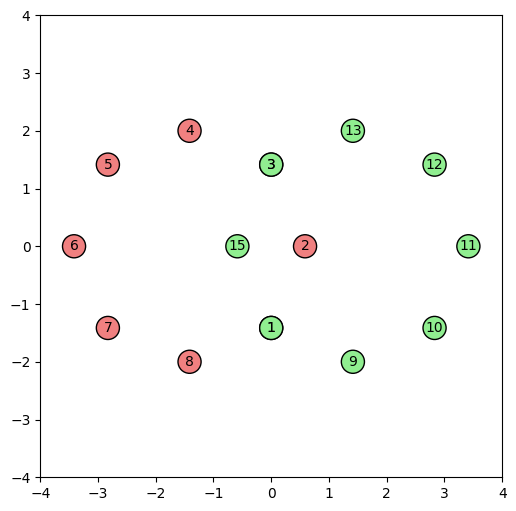

In [3]:
def calculate_positions(center, radius, num_circles, start_angle):
    positions = []
    for i in range(num_circles):
        angle = np.radians(start_angle + i * (360 / num_circles))
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        positions.append((x, y))
    return positions

# Ring parameters
R = 2
num_circles = 8
start_angle_ring1 = 0
start_angle_ring2 = 0
i, j = 1, 3 # indices of the circles to overlap

# Solve for d given the angles
theta1 = np.radians(start_angle_ring1 + i*(360/num_circles))
theta2 = np.radians(start_angle_ring2 + j*(360/num_circles))
d = -R*(np.cos(theta2) - np.cos(theta1))/2

# Set the centers of the rings
center_ring1 = (-d, 0)
center_ring2 = ( d, 0)

# Calculate positions
positions_ring1 = calculate_positions(center_ring1, R, num_circles, start_angle_ring1)
positions_ring2 = calculate_positions(center_ring2, R, num_circles, start_angle_ring2)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', 'box')

# Define numbering
numbers_ring1 = [2, 3, 4, 5, 6, 7, 8, 1]
numbers_ring2 = [11, 12, 13, 3, 15, 1, 9, 10]

# Draw ring 1
for idx, (x, y) in enumerate(positions_ring1):
    circle = Circle((x, y), 0.2, edgecolor='black', facecolor='lightcoral')
    ax.add_patch(circle)
    ax.text(x, y, str(numbers_ring1[idx]),
            color='black', ha='center', va='center', fontsize=10)

# Draw ring 2
for idx, (x, y) in enumerate(positions_ring2):
    circle = Circle((x, y), 0.2, edgecolor='black', facecolor='lightgreen')
    ax.add_patch(circle)
    ax.text(x, y, str(numbers_ring2[idx]),
            color='black', ha='center', va='center', fontsize=10)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.show()

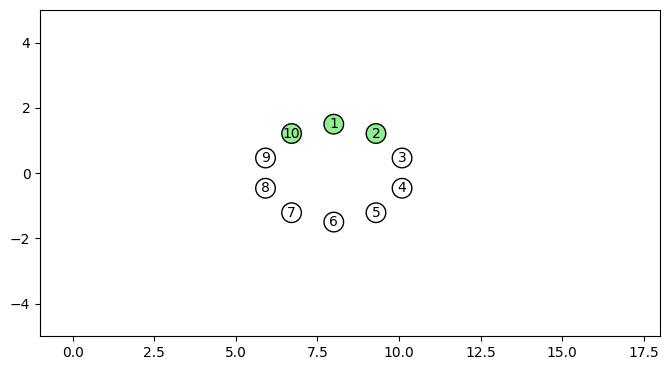

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_aspect('equal')

center_topspin = (8.0, 0.0)
# ax.text(center_topspin[0], 2.0, "TopSpin", fontsize=14, ha='center')

num_circles = 10
R_y = 1.5
R_x = 1.2 + 0.1 * num_circles

# oval = Ellipse(
#     center_topspin,
#     width=2*R_x, height=2*R_y,
#     edgecolor='black', facecolor='none',
#     linewidth=2
# )
# ax.add_patch(oval)

# index 0 is at the TOP (π/2) and go clockwise
angles = np.linspace(np.pi/2, np.pi/2 - 2*np.pi, num_circles, endpoint=False)
highlight_indices = {0, 1, num_circles - 1}

for i, angle in enumerate(angles):
    x = center_topspin[0] + R_x * np.cos(angle)
    y = center_topspin[1] + R_y * np.sin(angle)
    color = 'lightgreen' if i in highlight_indices else 'white'
    circle = Circle((x, y), radius=0.3, edgecolor='black', facecolor=color)
    ax.add_patch(circle)
    ax.text(x, y, str(i+1), ha='center', va='center', fontsize=10)

ax.set_xlim(-1, 18)
ax.set_ylim(-5, 5)
plt.show()

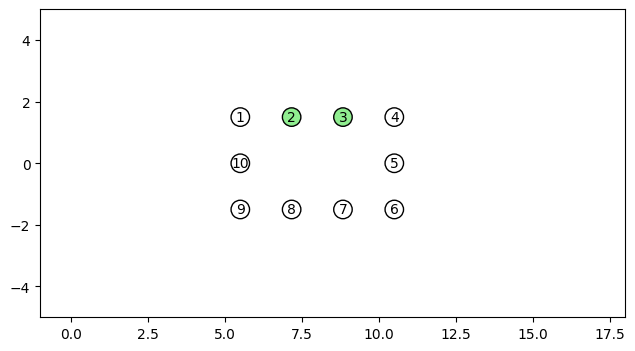

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_aspect('equal')

center_lrx = (8.0, 0.0)


width = 5.0  # width of the rectangle
height = 3.0  # height of the rectangle

positions = []

for i in range(4):
    x = center_lrx[0] - width/2 + i * width/3
    y = center_lrx[1] + height/2
    positions.append((x, y))

for i in range(1, 2):
    x = center_lrx[0] + width/2
    y = center_lrx[1]
    positions.append((x, y))

for i in range(4):
    x = center_lrx[0] + width/2 - i * width/3
    y = center_lrx[1] - height/2
    positions.append((x, y))

for i in range(1, 2): 
    x = center_lrx[0] - width/2
    y = center_lrx[1]
    positions.append((x, y))

highlight_indices = {1, 2}
for i, (x, y) in enumerate(positions):
    color = 'lightgreen' if i in highlight_indices else 'white'
    circle = Circle((x, y), radius=0.3, edgecolor='black', facecolor=color)
    ax.add_patch(circle)
    ax.text(x, y, str(i+1), ha='center', va='center', fontsize=10)

ax.set_xlim(-1, 18)
ax.set_ylim(-5, 5)
plt.show()

In [ ]:
center_lrx = centers[0]
    ax.text(center_lrx[0], title_y, "LRX", fontsize=fontsize_title, ha='center')
    
    w, h = puzzle_width/3, puzzle_width/4
    r = puzzle_width/15
    spacing = circle_radius * 2.2
    
    # Calculate the perimeter of the rectangle
    perimeter_horizontal = w - 2 * r
    perimeter_vertical = h - 2 * r
    arc_length = np.pi * r / 2  # Quarter of the circle
    total_perimeter = 2 * (perimeter_horizontal + perimeter_vertical) + 4 * arc_length

    # Number of circles along the entire perimeter
    n_total = int(total_perimeter / spacing)
    
    # Function to evenly distribute points
    def generate_points(start, length, n, is_arc=False, center=None, radius=None, start_angle=None, end_angle=None):
        if is_arc:
            angles = np.linspace(start_angle, end_angle, n, endpoint=False)
            return center[0] + radius * np.cos(angles), center[1] + radius * np.sin(angles)
        else:
            n = int(n)
            return np.linspace(start[0], start[0] + length, n, endpoint=False), np.full(n, start[1])
    
    # Top line
    x_top, y_top = generate_points((center_lrx[0] - w/2 + r, center_lrx[1] + h/2), perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))
    
    # Top right corner
    x_tr, y_tr = generate_points(
        None, None, int(n_total * arc_length / total_perimeter),
        is_arc=True, center=(center_lrx[0] + w/2 - r, center_lrx[1] + h/2 - r), radius=r, start_angle=np.pi/2, end_angle=0
    )
    
    # Right vertical line
    x_right, y_right = generate_points((center_lrx[0] + w/2, center_lrx[1] + h/2 - r), -perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))
    
    # Bottom right corner
    x_br, y_br = generate_points(
        None, None, int(n_total * arc_length / total_perimeter),
        is_arc=True, center=(center_lrx[0] + w/2 - r, center_lrx[1] - h/2 + r), radius=r, start_angle=0, end_angle=-np.pi/2
    )
    
    # Bottom line
    x_bottom, y_bottom = generate_points((center_lrx[0] + w/2 - r, center_lrx[1] - h/2), -perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))
    
    # Bottom left corner
    x_bl, y_bl = generate_points(
        None, None, int(n_total * arc_length / total_perimeter),
        is_arc=True, center=(center_lrx[0] - w/2 + r, center_lrx[1] - h/2 + r), radius=r, start_angle=-np.pi/2, end_angle=-np.pi
    )
    
    # Left vertical line
    x_left, y_left = generate_points((center_lrx[0] - w/2, center_lrx[1] - h/2 + r), perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))
    
    # Top left corner
    x_tl, y_tl = generate_points(
        None, None, int(n_total * arc_length / total_perimeter),
        is_arc=True, center=(center_lrx[0] - w/2 + r, center_lrx[1] + h/2 - r), radius=r, start_angle=-np.pi, end_angle=-3*np.pi/2
    )
    
    # Combine coordinates of all parts
    xs = np.concatenate([x_top, x_tr, x_right, x_br, x_bottom, x_bl, x_left, x_tl])
    ys = np.concatenate([y_top, y_tr, y_right, y_br, y_bottom, y_bl, y_left, y_tl])
    
    # Draw circles
    highlight_indices = {1, 2}
    for i, (x, y) in enumerate(zip(xs, ys)):
        color = highlight_color if i in highlight_indices else 'white'
        circle = Circle((x, y), radius=circle_radius, edgecolor='black', facecolor=color)
        ax.add_patch(circle)
        ax.text(x, y, str(i+1), ha='center', va='center', fontsize=fontsize_numbers)

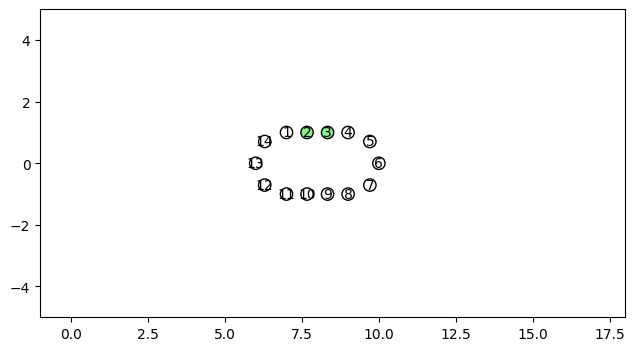

In [54]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_aspect("equal")
w, h = 4.0, 2.0
r = 1.0
spacing = 0.6

# Calculate the perimeter of the rectangle
perimeter_horizontal = w - 2 * r
perimeter_vertical = h - 2 * r
arc_length = np.pi * r / 2  # Quarter of the circle
total_perimeter = 2 * (perimeter_horizontal + perimeter_vertical) + 4 * arc_length

# Number of circles along the entire perimeter
n_total = int(total_perimeter / spacing)

# Function to evenly distribute points
def generate_points(start, length, n, is_arc=False, center=None, radius=None, start_angle=None, end_angle=None):
    if is_arc:
        angles = np.linspace(start_angle, end_angle, n, endpoint=False)
        return center[0] + radius * np.cos(angles), center[1] + radius * np.sin(angles)
    else:
        n = int(n)
        return np.linspace(start[0], start[0] + length, n, endpoint=False), np.full(n, start[1])

# Top line
x_top, y_top = generate_points((center_lrx[0] - w/2 + r, center_lrx[1] + h/2), perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))

# Top right corner
x_tr, y_tr = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(center_lrx[0] + w/2 - r, center_lrx[1] + h/2 - r), radius=r, start_angle=np.pi/2, end_angle=0
)

# Right vertical line
x_right, y_right = generate_points((center_lrx[0] + w/2, center_lrx[1] + h/2 - r), -perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))

# Bottom right corner
x_br, y_br = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(center_lrx[0] + w/2 - r, center_lrx[1] - h/2 + r), radius=r, start_angle=0, end_angle=-np.pi/2
)

# Bottom line
x_bottom, y_bottom = generate_points((center_lrx[0] + w/2 - r, center_lrx[1] - h/2), -perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))

# Bottom left corner
x_bl, y_bl = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(center_lrx[0] - w/2 + r, center_lrx[1] - h/2 + r), radius=r, start_angle=-np.pi/2, end_angle=-np.pi
)

# Left vertical line
x_left, y_left = generate_points((center_lrx[0] - w/2, center_lrx[1] - h/2 + r), perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))

# Top left corner
x_tl, y_tl = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(center_lrx[0] - w/2 + r, center_lrx[1] + h/2 - r), radius=r, start_angle=-np.pi, end_angle=-3*np.pi/2
)

# Combine coordinates of all parts
xs = np.concatenate([x_top, x_tr, x_right, x_br, x_bottom, x_bl, x_left, x_tl])
ys = np.concatenate([y_top, y_tr, y_right, y_br, y_bottom, y_bl, y_left, y_tl])

# Draw circles
highlight_indices = {1, 2}
for i, (x, y) in enumerate(zip(xs, ys)):
    color = 'lightgreen' if i in highlight_indices else 'white'
    circle = Circle((x, y), radius=0.2, edgecolor='black', facecolor=color)
    ax.add_patch(circle)
    ax.text(x, y, str(i+1), ha='center', va='center', fontsize=10)

ax.set_xlim(-1, 18)
ax.set_ylim(-5, 5)
plt.show()

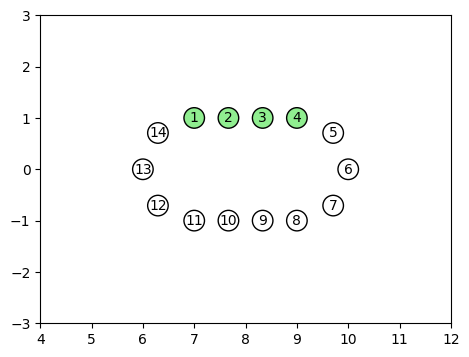

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_aspect("equal")

cx, cy = 8.0, 0.0  # Центр прямоугольника
w, h = 4.0, 2.0    # Ширина и высота прямоугольника
r = 1.0            # Радиус скруглённых углов
spacing = 0.6      # Расстояние между кружками

# Вычисление длины каждого сегмента
perimeter_horizontal = w - 2 * r
perimeter_vertical = h - 2 * r
arc_length = np.pi * r / 2  # Четверть окружности
total_perimeter = 2 * (perimeter_horizontal + perimeter_vertical) + 4 * arc_length

# Количество кружков вдоль всего периметра
n_total = int(total_perimeter / spacing)

# Функция для равномерного размещения точек
def generate_points(start, length, n, is_arc=False, center=None, radius=None, start_angle=None, end_angle=None):
    if is_arc:
        angles = np.linspace(start_angle, end_angle, n, endpoint=False)
        return center[0] + radius * np.cos(angles), center[1] + radius * np.sin(angles)
    else:
        n = int(n)  # Преобразуем n в целое число
        return np.linspace(start[0], start[0] + length, n, endpoint=False), np.full(n, start[1])

# Расчёт координат
positions = []
current_position = 0

# Верхняя линия
x_top, y_top = generate_points((cx - w/2 + r, cy + h/2), perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))

# Верхний правый угол
x_tr, y_tr = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx + w/2 - r, cy + h/2 - r), radius=r, start_angle=np.pi/2, end_angle=0
)

# Правая вертикальная линия
x_right, y_right = generate_points((cx + w/2, cy + h/2 - r), -perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))

# Нижний правый угол
x_br, y_br = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx + w/2 - r, cy - h/2 + r), radius=r, start_angle=0, end_angle=-np.pi/2
)

# Нижняя линия
x_bottom, y_bottom = generate_points((cx + w/2 - r, cy - h/2), -perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))

# Нижний левый угол
x_bl, y_bl = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx - w/2 + r, cy - h/2 + r), radius=r, start_angle=-np.pi/2, end_angle=-np.pi
)

# Левая вертикальная линия
x_left, y_left = generate_points((cx - w/2, cy - h/2 + r), perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))

# Верхний левый угол
x_tl, y_tl = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx - w/2 + r, cy + h/2 - r), radius=r, start_angle=-np.pi, end_angle=-3*np.pi/2
)

# Объединяем координаты всех частей
xs = np.concatenate([x_top, x_tr, x_right, x_br, x_bottom, x_bl, x_left, x_tl])
ys = np.concatenate([y_top, y_tr, y_right, y_br, y_bottom, y_bl, y_left, y_tl])

# Рисуем кружки
highlight_indices = {0, 1, 2, 3}
for i, (x, y) in enumerate(zip(xs, ys)):
    color = 'lightgreen' if i in highlight_indices else 'white'
    circle = Circle((x, y), 0.2, edgecolor='black', facecolor=color)
    ax.add_patch(circle)
    ax.text(x, y, str(i + 1), ha='center', va='center')

# Пределы графика
ax.set_xlim(cx - w/2 - 2, cx + w/2 + 2)
ax.set_ylim(cy - h/2 - 2, cy + h/2 + 2)
plt.show()

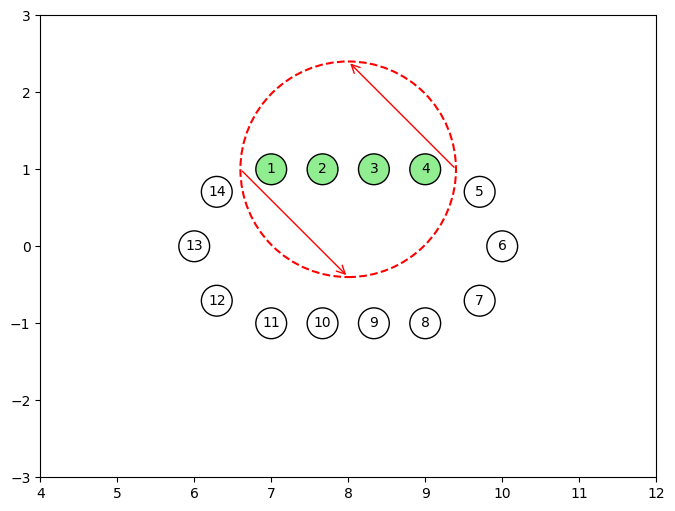

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_aspect("equal")

cx, cy = 8.0, 0.0  # Центр прямоугольника
w, h = 4.0, 2.0    # Ширина и высота прямоугольника
r = 1.0            # Радиус скруглённых углов
spacing = 0.6      # Расстояние между кружками

# Вычисление длины каждого сегмента
perimeter_horizontal = w - 2 * r
perimeter_vertical = h - 2 * r
arc_length = np.pi * r / 2  # Четверть окружности
total_perimeter = 2 * (perimeter_horizontal + perimeter_vertical) + 4 * arc_length

# Количество кружков вдоль всего периметра
n_total = int(total_perimeter / spacing)

# Функция для равномерного размещения точек
def generate_points(start, length, n, is_arc=False, center=None, radius=None, start_angle=None, end_angle=None):
    if is_arc:
        angles = np.linspace(start_angle, end_angle, n, endpoint=False)
        return center[0] + radius * np.cos(angles), center[1] + radius * np.sin(angles)
    else:
        n = int(n)  # Преобразуем n в целое число
        return np.linspace(start[0], start[0] + length, n, endpoint=False), np.full(n, start[1])

# Расчёт координат
positions = []
current_position = 0

# Верхняя линия
x_top, y_top = generate_points((cx - w/2 + r, cy + h/2), perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))

# Верхний правый угол
x_tr, y_tr = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx + w/2 - r, cy + h/2 - r), radius=r, start_angle=np.pi/2, end_angle=0
)

# Правая вертикальная линия
x_right, y_right = generate_points((cx + w/2, cy + h/2 - r), -perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))

# Нижний правый угол
x_br, y_br = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx + w/2 - r, cy - h/2 + r), radius=r, start_angle=0, end_angle=-np.pi/2
)

# Нижняя линия
x_bottom, y_bottom = generate_points((cx + w/2 - r, cy - h/2), -perimeter_horizontal, int(n_total * perimeter_horizontal / total_perimeter))

# Нижний левый угол
x_bl, y_bl = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx - w/2 + r, cy - h/2 + r), radius=r, start_angle=-np.pi/2, end_angle=-np.pi
)

# Левая вертикальная линия
x_left, y_left = generate_points((cx - w/2, cy - h/2 + r), perimeter_vertical, int(n_total * perimeter_vertical / total_perimeter))

# Верхний левый угол
x_tl, y_tl = generate_points(
    None, None, int(n_total * arc_length / total_perimeter),
    is_arc=True, center=(cx - w/2 + r, cy + h/2 - r), radius=r, start_angle=-np.pi, end_angle=-3*np.pi/2
)

# Объединяем координаты всех частей
xs = np.concatenate([x_top, x_tr, x_right, x_br, x_bottom, x_bl, x_left, x_tl])
ys = np.concatenate([y_top, y_tr, y_right, y_br, y_bottom, y_bl, y_left, y_tl])

# Рисуем кружки
highlight_indices = {0, 1, 2, 3}
for i, (x, y) in enumerate(zip(xs, ys)):
    color = 'lightgreen' if i in highlight_indices else 'white'
    circle = Circle((x, y), 0.2, edgecolor='black', facecolor=color)
    ax.add_patch(circle)
    ax.text(x, y, str(i + 1), ha='center', va='center')

# Добавляем окружность вокруг выделенных кружков
highlight_coords = [(xs[i], ys[i]) for i in highlight_indices]
highlight_xs = [coord[0] for coord in highlight_coords]
highlight_ys = [coord[1] for coord in highlight_coords]

center_x = np.mean(highlight_xs)
center_y = np.mean(highlight_ys)
radius_highlight = np.sqrt((max(highlight_xs) - center_x)**2 + (max(highlight_ys) - center_y)**2) + 0.4
highlight_circle = Circle((center_x, center_y), radius_highlight, edgecolor='red', facecolor='none', linewidth=1.5, linestyle='--')
ax.add_patch(highlight_circle)

# Добавляем стрелки для вращения
arrow1 = FancyArrowPatch((center_x + radius_highlight, center_y),
                         (center_x, center_y + radius_highlight),
                         arrowstyle='->', mutation_scale=15, color='red')
arrow2 = FancyArrowPatch((center_x - radius_highlight, center_y),
                         (center_x, center_y - radius_highlight),
                         arrowstyle='->', mutation_scale=15, color='red')
ax.add_patch(arrow1)
ax.add_patch(arrow2)

# Пределы графика
ax.set_xlim(cx - w/2 - 2, cx + w/2 + 2)
ax.set_ylim(cy - h/2 - 2, cy + h/2 + 2)
plt.show()